In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Movies.csv to Movies.csv


In [ ]:
import pandas as pd
df = pd.read_csv("Movies.csv", sep=',')

df.head()

Unnamed: 0      id                     title original_language  \
0           0  616037    Thor: Love and Thunder                en   
1           1  766507                      Prey                en   
2           2  507086   Jurassic World Dominion                en   
3           3  438148  Minions: The Rise of Gru                en   
4           4  361743         Top Gun: Maverick                en   

  release_date                genre_ids  popularity  vote_average  vote_count  
0   2022-07-06             [28, 12, 14]    7709.008           6.8        1803  
1   2022-08-02        [28, 53, 878, 27]    8775.992           8.2        2006  
2   2022-06-01            [12, 28, 878]    4775.953           7.1        2706  
3   2022-06-29  [10751, 16, 12, 35, 14]    4499.308           7.8        1273  
4   2022-05-24                 [28, 18]    3952.536           8.3        1877

In [ ]:
# Shape of the dataset
print("Shape:", df.shape)
# Column names
print("Columns:", df.columns.tolist())
# Data types and non-null values
df.info()
# Summary statistics for numeric features
df.describe()

Shape: (22300, 9)
Columns: ['Unnamed: 0', 'id', 'title', 'original_language', 'release_date', 'genre_ids', 'popularity', 'vote_average', 'vote_count']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22300 entries, 0 to 22299
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         22300 non-null  int64  
 1   id                 22300 non-null  int64  
 2   title              22300 non-null  object 
 3   original_language  22300 non-null  object 
 4   release_date       22218 non-null  object 
 5   genre_ids          22300 non-null  object 
 6   popularity         22300 non-null  float64
 7   vote_average       22300 non-null  float64
 8   vote_count         22300 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 1.5+ MB


Unnamed: 0            id    popularity  vote_average    vote_count
count  22300.000000  2.230000e+04  22300.000000  22300.000000  22300.000000
mean   11149.500000  2.854277e+05     53.513291      6.315256   1601.838565
std     6437.599837  2.998069e+05    193.496412      1.447448   2998.123814
min        0.000000  3.000000e+00      6.973000      0.000000      0.000000
25%     5574.750000  1.249800e+04     16.753000      5.900000    118.000000
50%    11149.500000  1.743160e+05     24.111500      6.500000    467.000000
75%    16724.250000  5.133100e+05     46.751000      7.200000   1599.000000
max    22299.000000  1.008270e+06   8775.992000     10.000000  32036.000000

In [ ]:
# Check for missing values
df.isnull().sum()

Unnamed: 0            0
id                    0
title                 0
original_language     0
release_date         82
genre_ids             0
popularity            0
vote_average          0
vote_count            0
dtype: int64

In [ ]:
# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [ ]:
# Basic overview of the dataset
df_info = df.info()
df_head = df.head()

# Checking missing values, duplicates, and summary statistics to find outliers
missing_values = df.isnull().sum()
duplicates = df.duplicated().sum()
summary_stats = df.describe()

missing_values, duplicates, summary_stats, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22300 entries, 0 to 22299
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         22300 non-null  int64  
 1   id                 22300 non-null  int64  
 2   title              22300 non-null  object 
 3   original_language  22300 non-null  object 
 4   release_date       22218 non-null  object 
 5   genre_ids          22300 non-null  object 
 6   popularity         22300 non-null  float64
 7   vote_average       22300 non-null  float64
 8   vote_count         22300 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 1.5+ MB


(Unnamed: 0            0
 id                    0
 title                 0
 original_language     0
 release_date         82
 genre_ids             0
 popularity            0
 vote_average          0
 vote_count            0
 dtype: int64,
 np.int64(0),
          Unnamed: 0            id    popularity  vote_average    vote_count
 count  22300.000000  2.230000e+04  22300.000000  22300.000000  22300.000000
 mean   11149.500000  2.854277e+05     53.513291      6.315256   1601.838565
 std     6437.599837  2.998069e+05    193.496412      1.447448   2998.123814
 min        0.000000  3.000000e+00      6.973000      0.000000      0.000000
 25%     5574.750000  1.249800e+04     16.753000      5.900000    118.000000
 50%    11149.500000  1.743160e+05     24.111500      6.500000    467.000000
 75%    16724.250000  5.133100e+05     46.751000      7.200000   1599.000000
 max    22299.000000  1.008270e+06   8775.992000     10.000000  32036.000000,
    Unnamed: 0      id                     title ori

In [ ]:
import ast
from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler, LabelEncoder

# Step 1: Select a small sample (first 2 rows) for snapshot
sample_df = df[['title', 'popularity', 'vote_average', 'genre_ids', 'original_language']].iloc[:2].copy()

# Step 2: BEFORE Snapshot
before_snapshot = sample_df.copy()
print("📸 BEFORE PREPROCESSING")
display(before_snapshot)

📸 BEFORE PREPROCESSING


title  popularity  vote_average          genre_ids  \
0  Thor: Love and Thunder    7709.008           6.8       [28, 12, 14]   
1                    Prey    8775.992           8.2  [28, 53, 878, 27]   

  original_language  
0                en  
1                en

In [ ]:

# Step 3: Convert genre_ids string to list
sample_df['genre_ids'] = sample_df['genre_ids'].apply(ast.literal_eval)

# Step 4: One-hot encode genre_ids
mlb = MultiLabelBinarizer()
genre_encoded = pd.DataFrame(mlb.fit_transform(sample_df['genre_ids']),
                             columns=[f'genre_{g}' for g in mlb.classes_])

# Step 5: Label encode 'original_language'
le = LabelEncoder()
sample_df['original_language'] = le.fit_transform(sample_df['original_language'])

# Step 6: Normalize 'popularity' and 'vote_average' using Min-Max Scaling
scaler = MinMaxScaler()
scaled = scaler.fit_transform(sample_df[['popularity', 'vote_average']])
scaled_df = pd.DataFrame(scaled, columns=['popularity', 'vote_average'])

# Step 7: Combine all columns into the AFTER snapshot
after_snapshot = pd.concat([sample_df[['title']], scaled_df, genre_encoded, sample_df[['original_language']]], axis=1)

print("✅ AFTER PREPROCESSING")
display(after_snapshot)

✅ AFTER PREPROCESSING


title  popularity  vote_average  genre_12  genre_14  \
0  Thor: Love and Thunder         0.0           0.0         1         1   
1                    Prey         1.0           1.0         0         0   

   genre_27  genre_28  genre_53  genre_878  original_language  
0         0         1         0          0                  0  
1         1         1         1          1                  0

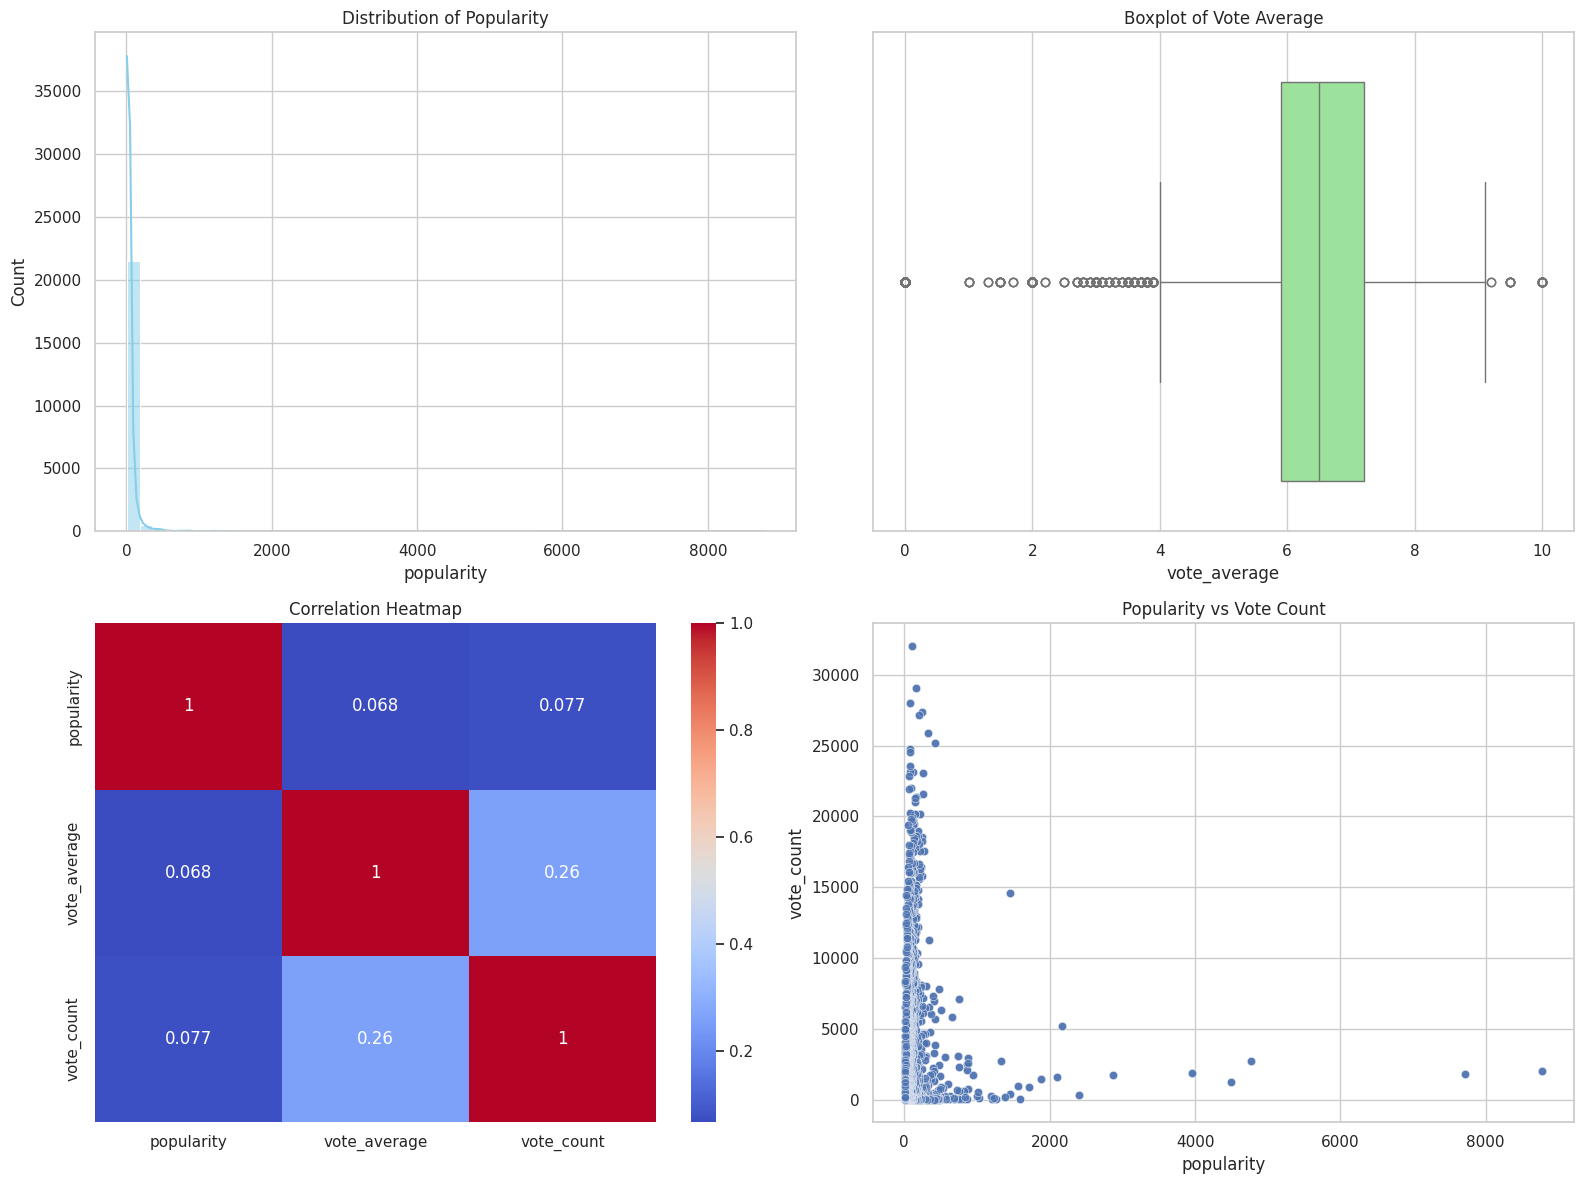

{'Popularity Distribution': 'Right-skewed. Most movies have low popularity, few are extremely popular.',
 'Vote Average Boxplot': 'Most ratings fall between 5 and 7. Outliers exist with both low and high ratings.',
 'Correlation Heatmap': 'Popularity has moderate correlation with vote_count, but weak with vote_average.',
 'Scatterplot': 'Popular movies generally receive higher vote counts, forming a rising trend.'}

In [ ]:
#Visualize a Few Features

import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Sample data for EDA
eda_df = df[['popularity', 'vote_average', 'vote_count']].copy()

# Drop NaN values for cleaner visualization
eda_df = eda_df.dropna()

# Create visualizations
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Histogram - Popularity
sns.histplot(eda_df['popularity'], bins=50, ax=axs[0, 0], kde=True, color='skyblue')
axs[0, 0].set_title('Distribution of Popularity')

# Boxplot - Vote Average
sns.boxplot(x=eda_df['vote_average'], ax=axs[0, 1], color='lightgreen')
axs[0, 1].set_title('Boxplot of Vote Average')

# Heatmap - Correlation
corr = eda_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=axs[1, 0])
axs[1, 0].set_title('Correlation Heatmap')

# Scatterplot - Popularity vs Vote Count
sns.scatterplot(data=eda_df, x='popularity', y='vote_count', ax=axs[1, 1], alpha=0.6)
axs[1, 1].set_title('Popularity vs Vote Count')

plt.tight_layout()
plt.show()

# Summarizing key insights
insights = {
    "Popularity Distribution": "Right-skewed. Most movies have low popularity, few are extremely popular.",
    "Vote Average Boxplot": "Most ratings fall between 5 and 7. Outliers exist with both low and high ratings.",
    "Correlation Heatmap": "Popularity has moderate correlation with vote_count, but weak with vote_average.",
    "Scatterplot": "Popular movies generally receive higher vote counts, forming a rising trend."
}

insights




In [ ]:
# Show original data (before transformation)
df[['vote_average', 'vote_count', 'popularity', 'release_date', 'original_language']].head()


vote_average  vote_count  popularity release_date original_language
0           6.8        1803    7709.008   2022-07-06                en
1           8.2        2006    8775.992   2022-08-02                en
2           7.1        2706    4775.953   2022-06-01                en
3           7.8        1273    4499.308   2022-06-29                en
4           8.3        1877    3952.536   2022-05-24                en

In [ ]:
# Copy relevant columns
fe_df = df[['vote_average', 'vote_count', 'popularity', 'release_date', 'original_language']].copy()

# Drop rows with missing release_date or runtime
fe_df = fe_df.dropna(subset=['release_date'])

# New Features
fe_df['release_year'] = pd.to_datetime(fe_df['release_date'], errors='coerce').dt.year
fe_df['rating_score'] = fe_df['vote_average'] * fe_df['vote_count']
fe_df['popularity_bucket'] = pd.cut(fe_df['popularity'],
                                    bins=[-1, 10, 50, 100, 500, 10000],
                                    labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])


from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Select features
selected_features = fe_df[['popularity', 'rating_score','release_year', 'original_language']]

# Scale numerical features
scaler = MinMaxScaler()
selected_features[['popularity', 'rating_score']] = scaler.fit_transform(
    selected_features[['popularity', 'rating_score']]
)

# Encode categorical feature
le = LabelEncoder()
selected_features['original_language'] = le.fit_transform(selected_features['original_language'])


# Show transformed data
selected_features.head()


<ipython-input-24-71355e60d8de>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features[['popularity', 'rating_score']] = scaler.fit_transform(
<ipython-input-24-71355e60d8de>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features['original_language'] = le.fit_transform(selected_features['original_language'])


popularity  rating_score  release_year  original_language
0    0.878319      0.045560          2022                  9
1    1.000000      0.061126          2022                  9
2    0.543827      0.071395          2022                  9
3    0.512278      0.036898          2022                  9
4    0.449923      0.057893          2022                  9

In [ ]:
# Identify Target and Features for the current dataset
# Let's choose 'vote_average' as the target for a sample ML task (like regression)

target = 'vote_average'
features = df.columns.drop(target)

# Display features
features
import pandas as pd


# Load the dataset
df = pd.read_csv("Movies.csv")

# Choose a target column for your analysis (example: 'vote_average')
target = 'vote_average'

# Get all other columns as features
features = df.columns.drop(target)

# Print the features
print("Features:", features)



Features: Index(['Unnamed: 0', 'id', 'title', 'original_language', 'release_date',
       'genre_ids', 'popularity', 'vote_count'],
      dtype='object')


In [ ]:
# Identify categorical columns in your dataset
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols.tolist()


['title', 'original_language', 'release_date', 'genre_ids']

In [ ]:
#Convert Categorical Columns to Numerical

import pandas as pd

# Load your dataset
df = pd.read_csv("Movies.csv")

# Apply one-hot encoding (this will convert all categorical columns to numerical)
df_encoded = pd.get_dummies(df, drop_first=True)

# View the first few rows
print(df_encoded.head())


   Unnamed: 0      id  popularity  vote_average  vote_count  \
0           0  616037    7709.008           6.8        1803   
1           1  766507    8775.992           8.2        2006   
2           2  507086    4775.953           7.1        2706   
3           3  438148    4499.308           7.8        1273   
4           4  361743    3952.536           8.3        1877   

   title_#realityhigh  title_'71  title_(500) Days of Summer  \
0               False      False                       False   
1               False      False                       False   
2               False      False                       False   
3               False      False                       False   
4               False      False                       False   

   title_*batteries not included  title_...And Justice for All  ...  \
0                          False                         False  ...   
1                          False                         False  ...   
2                      

In [ ]:
    #Feature Scaling
    from sklearn.preprocessing import StandardScaler

    # Drop unnecessary columns
    df_cleaned = df.drop(columns=['Unnamed: 0', 'id', 'title', 'release_date', 'genre_ids'])

    # One-hot encode the 'original_language' column
    df_encoded = pd.get_dummies(df_cleaned, columns=['original_language'], drop_first=True)

    # Set target and features
    target_column = 'vote_average'
    X = df_encoded.drop(columns=[target_column])
    y = df_encoded[target_column]

    # Apply StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Convert to DataFrame for visualization
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

    # Show the first few rows of the scaled data and target
    X_scaled_df.head(), y.head()


(   popularity  vote_count  original_language_ar  original_language_bn  \
 0   39.564901    0.067097             -0.021181             -0.025064   
 1   45.079256    0.134808             -0.021181             -0.025064   
 2   24.406373    0.368292             -0.021181             -0.025064   
 3   22.976625   -0.109684             -0.021181             -0.025064   
 4   20.150814    0.091780             -0.021181             -0.025064   
 
    original_language_ca  original_language_cn  original_language_cs  \
 0             -0.014975             -0.099589             -0.016405   
 1             -0.014975             -0.099589             -0.016405   
 2             -0.014975             -0.099589             -0.016405   
 3             -0.014975             -0.099589             -0.016405   
 4             -0.014975             -0.099589             -0.016405   
 
    original_language_da  original_language_de  original_language_el  ...  \
 0             -0.045465             -0.085

In [ ]:
#Train-Test Split

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Fit a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(1.9489751123605106, 0.09898826573449193)

In [ ]:
#Model Building

from sklearn.linear_model import LinearRegression

# Build the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


In [ ]:
#Evaluation

from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 Score:", r2)


MSE: 1.9489751123605106
R2 Score: 0.09898826573449193


In [ ]:
import numpy as np
import pandas as pd

# 1. Define new movie input (change values as needed to reflect your data)
new_movie = {
    'popularity': 45.3,
    'vote_count': 1000,
    'original_language_en': 1,
    'original_language_fr': 0,
    'original_language_hi': 0,
    'original_language_ja': 0,
    'original_language_ko': 0,
    'original_language_ru': 0,
    'original_language_te': 0,
    'original_language_tr': 0,
    'original_language_zh': 0
    # Add or adjust fields based on your actual one-hot encoded columns
}

# 2. Convert to DataFrame
new_df = pd.DataFrame([new_movie])

# 3. Reindex to match model input columns (very important)
new_df = new_df.reindex(columns=df_encoded.drop('vote_average', axis=1).columns, fill_value=0)

# 4. Scale input using same scaler used during training
new_input_scaled = scaler.transform(new_df)

# 5. Predict using trained model
predicted_rating = model.predict(new_input_scaled)

# 6. Output prediction
print("Predicted vote_average:", predicted_rating[0])


Predicted vote_average: 6.203164251681337


In [ ]:
# Predict the vote_average using the trained model
predicted_rating = model.predict(new_input_scaled)

# Print the result
print("🎬 Predicted Vote Average (Rating):", round(predicted_rating[0], 2))


🎬 Predicted Vote Average (Rating): 6.2


In [ ]:
# Install ipywidgets if not already installed
!pip install ipywidgets

import pandas as pd
import ast
import ipywidgets as widgets
from IPython.display import display, HTML, clear_output

# ✅ Convert genre_ids string to list (if necessary)
df['genre_ids'] = df['genre_ids'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# ✅ Genre mapping
genre_map = {
    28: "Action",
    12: "Adventure",
    14: "Fantasy",
    16: "Animation",
    18: "Drama",
    27: "Horror",
    35: "Comedy",
    53: "Thriller",
    10751: "Family",
    878: "Science Fiction"
}

reverse_map = {v: k for k, v in genre_map.items()}

# ✅ Create UI widgets
genre_dropdown = widgets.Dropdown(
    options=sorted(genre_map.values()),
    description="🎬 Genre:"
)

rating_slider = widgets.FloatSlider(
    value=7.0, min=0.0, max=10.0, step=0.1, description="⭐ Min Rating:"
)

recommend_button = widgets.Button(
    description="🎯 Show Recommendations",
    button_style="success"
)

output_area = widgets.Output()

# ✅ Function to recommend movies
def recommend_movies(b):
    selected_genre_name = genre_dropdown.value
    selected_genre_id = reverse_map[selected_genre_name]
    min_rating = rating_slider.value

    with output_area:
        clear_output()
        display(HTML("<h3 style='color:#2E86C1;'>🎥 Top Movie Recommendations</h3>"))

        filtered_df = df[
            df['genre_ids'].apply(lambda genres: selected_genre_id in genres) &
            (df['vote_average'] >= min_rating)
        ]

        if filtered_df.empty:
            print("❌ No movies match the selected filters.")
        else:
            display(filtered_df[['title', 'vote_average']].sort_values(by='vote_average', ascending=False).head(5))

recommend_button.on_click(recommend_movies)

# ✅ Display UI
display(HTML("<h2 style='color:#1ABC9C;'>🎬 Movie Recommender System</h2>"))
display(HTML("<p><strong>Select a genre and minimum rating to get personalized movie suggestions:</strong></p>"))
display(genre_dropdown)
display(rating_slider)
display(recommend_button)
display(output_area)


Dropdown(description='🎬 Genre:', options=('Action', 'Adventure', 'Animation', 'Comedy', 'Drama', 'Family', 'Fa…

FloatSlider(value=7.0, description='⭐ Min Rating:', max=10.0)

Button(button_style='success', description='🎯 Show Recommendations', style=ButtonStyle())

Output()